# CNN (Convolutional Neural Network)

컨볼루셔널 뉴럴 네트워크(CNN)는 컴퓨터 비전에서 많이 사용되는 딥러닝 모델입니다. 

CNN의 장점은 가장 기본적인 딥러닝 모델인 다층 퍼셉트론과 비교하면 쉽게 이해할 수 있습니다.

먼저 다음과 같은 다층 퍼셉트론으로 MNIST 데이터를 입력받아 숫자를 예측하는 모델을 보겠습니다.

컴퓨터 비전(computer vision)은 디지털 이미지와 동영상 속 사물을 식별하는 기술이다.

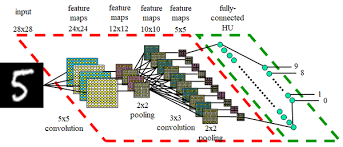

In [1]:
from IPython.display import Image
 
Image('5_images.png')

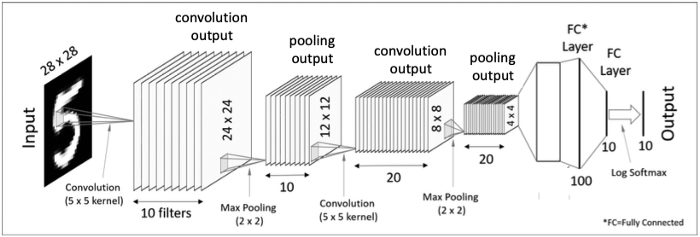

In [2]:
from IPython.display import Image
 
Image('5_images2.png')

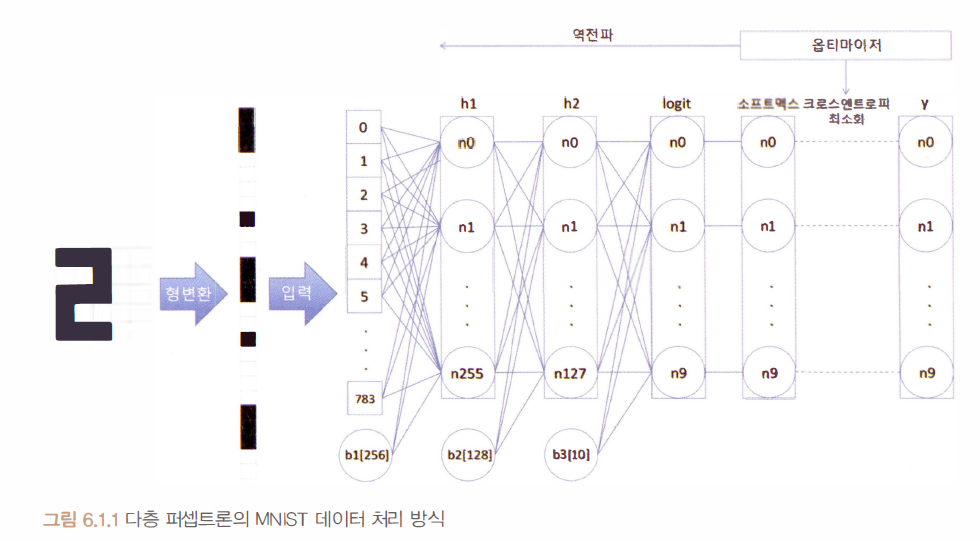

다층 퍼셉트론의 첫 번째 단점은 고유 이미지의 생김새 정보를 사용할 수 없다는 것 입니다.

사람이 숫자의 생김새를 봤을 때 직선이 위에서 아래로 하나 있으면 숫자 1, 동그라미 한 개가 있으면 숫자 0 이라는 정보를 쉽게 알 수 있습니다. 

다층 퍼셉트론의 경우 데이터를 입력하기 위해 2 차원 평면에 있는 숫자를 1 차원 배열로 형 변환해야 합니다. 

1 차원 배열로 형 변환된 데이터는 위 그림에서 볼 수 있듯이 언뜻 우리가 이 형 변환된 배열을 봐도 원래 고유의 숫자 이미지를 떠올리기 쉽지 않습니다. 

이는 컴퓨터도 마찬가지 입니다. 

형 변환된 데이터를 입력 받는 다층 퍼셉트론의 경우, 고유 데이터가 2 차원 평면에서 가지고 있던 지역적인 정보를 잃은 채로 학습을 시작합니다.

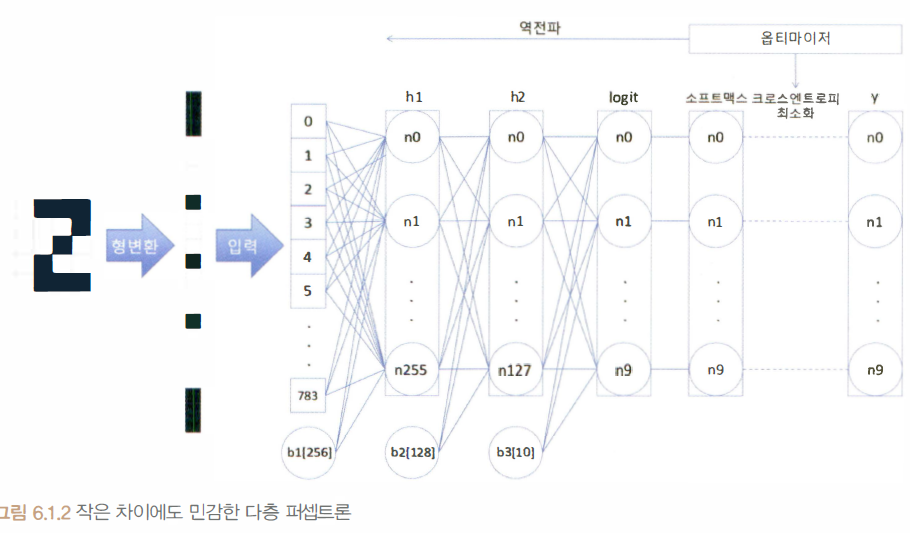

두 번째 단점은 다층 퍼셉트론은 픽셀 하나하나의 변화에 상당히 민감하다는 것입니다. 

이미지의 생김새로 이미지를 분류할 경우 픽셀 한두 개가 달라도 작대기 하나만 있는 숫자는 1, 동그라미 1개만 있는 숫자는 0 이라고 쉽게 분류할 것입니다. 

하지만 이미지의 생김새 정보를 시용할 수 없는 다층 퍼셉트론은 가지고 있는 정보가 픽셀밖에 없기 때문에 픽셀 한두 개의 차이가 모델 예측에 큰 영향을 끼치게 됩니다.

세 번째 단점은 다층 퍼셉트론은 픽셀 한두 개의 정보에도 민감하게 반응하기 위해 상당히 많은 변수를 모델 안에 가지고 있다는 것입니다. 

이로 인해 모델의 크기를 크게 만들고, 학습 시간이 오래 걸리며, 자칫 질못하면 과대 적합된 모델이 되기 쉽습니다.

# 생김새 정보 획득하기

다층 퍼셉트론의 단점은 최초부터 생김새 정보를 잃고 시작하는 데서 비롯됩니다. 

그렇다면 어떻게 하면 모델이 생김새 정보를 활용할 수 있을까요? 

우리의 뇌는 어떻게 생김새 정보를 활용해 사물을 구별할까요? 

다음 그림을 보면 두 개의 비슷한 생김새의 숫자 2가 있습니다.

생김새가 달라도 어렴풋이 머리와 꼬리 부분이 있고, 머리와 꼬리를 잇는 대각선이 있다면 단번에 숫자 2임을 판별할 수 있습니다.

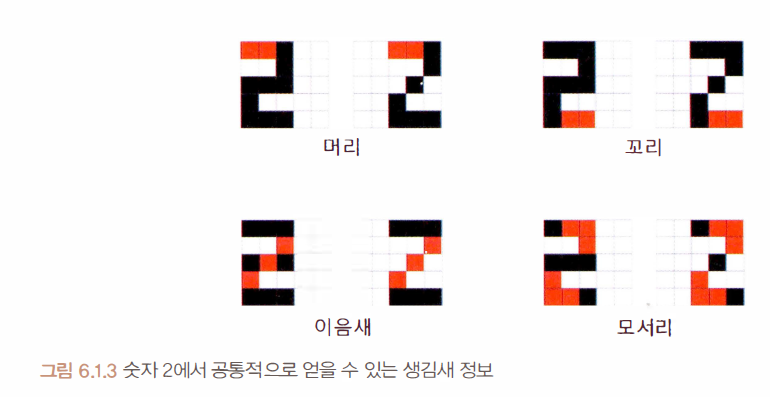

# 생김새 정보를 학습하는 CNN

CNN은 바로 우리의 뇌가 사물을 구별하듯 생김새 정보로 사물을 학습하고 구별해 냅니다. 

생김새는 각 사물의 특징이라고 할 수 있고, CNN은 학습 과정을 통해 어떠한 특징이 사물을 구별하는 주요 특징인지를 알아냅니다.

# CNN은 어떻게 특징을 찾아내는가?

디층 퍼셉트론과 다르게 CNN은 고유 이미지의 형 변환 없이 그대로 입력 데이터를 처리합니다. 

즉, 2 차원 데이터인 MNIST 데이터를 그대로 처리하기 때문에 생김새 정보를 잃지 않습니다. 

다음 그림은 CNN이 어떻게 특징을 찾아내는지를 잘 설명 해줍니다.

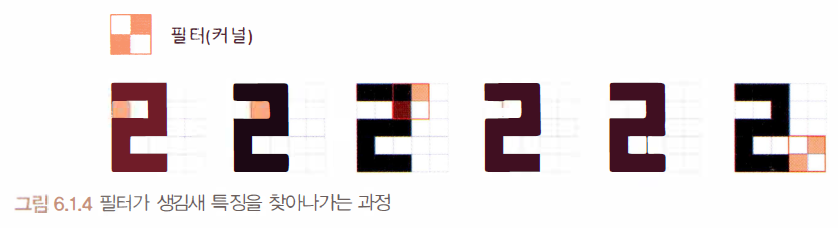

# 스트라이드, 필터 , 수용 영역

위 그림에서 필터 또는 커널이라고 불리는 반투명한 네모 상자가 이미지의 왼쪽 최상단에서 조금씩 이동하며, 최종적으로 오른쪽 최하단까지 이동하는 것을 볼 수 있습니다. 이 처럼 필터를 이동하는 기법을 스트라이드(stride 라고 합니다.)

필터는 특징을 추출하기 위한 네모 상자입니다. 그리고 이 필터와 겹치는 이미지 부분을 수용 영역 이라고 부릅니다. 위 그림의 예제에서는 대각선 생김새를 찾기 위한 필터가 스트라이드 하는 모습을 보여줍니다.

디음 그림에서 대각선 필터는 숫자 2로부터 두 곳의 대각선 특징을 감지 합니다. 반면 숫자 1 에서는 한 곳의 대각선 특징도 발견하지 못합니다.

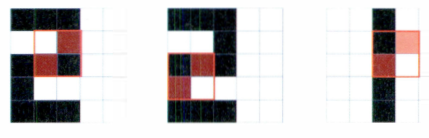

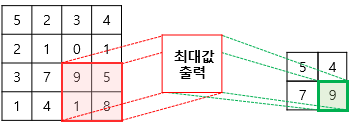

In [3]:
from IPython.display import Image
 
Image('padding1.png')

모든 딥러닝 모델이 그렇듯이 CNN 모델 역시 수학적인 모델입니다. 이제 필터가 어떻게 특징을 추출해내는지 아주 간단한 산수로 알아보겠습니다. 

MNIST 숫자 데이터는 흑백 이미지로서 각 픽셀은 숫자 0부터 255 까지의 값 중 하나를 가지고 있습니다. 픽셀 안의 숫자 0은 흰색을 의미하며, 255는 검은색, 그리고 그 안의 숫자는 흰색과 검은색 사이의 어떤 색을 의미합니다. 만약 이미지 안에 흰색과 검은색만 존재 한다면 다음 그림과 같이 0과 255로만 구성돼 있을 것입니다.

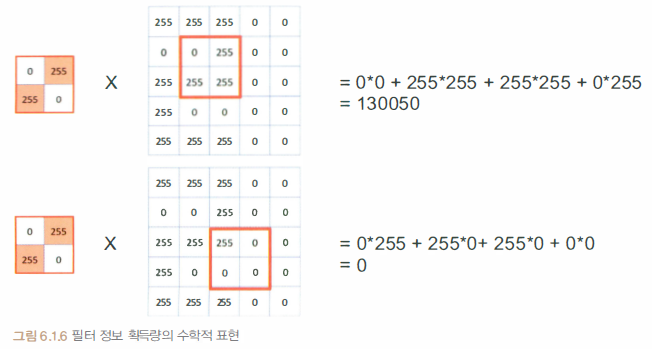

위 그림에서 알수있듯이 필터 안에는 특정한 숫자가 들어 있고, 필터와 이미지 영역의 겹치는 부분마다 곱셈이 이뤄집니다. 필터에 총 4개의 픽셀이 있으면 4개의 영역이 곱해지고, 곱해진 값은 최종적으로 더해집니다. 최종값이 크다라는 의미는 필터와 겹쳐진 부분이 많다는 의미이며, 반대로 최종값이 작을 경우 필터와 겹치는 부분이 적었다라고 해석할 수 있습니다.

숫자를 구분하기 위해서는 CNN 모델 안에 여러 개의 필터가 존재 해야 합니다. 마치 우리 뇌가 숫자를 인식하기 위해 직선, 곡선, 동그라미 등을 구별해야 하듯이 CNN 모델안에는 각 특성 개수만큼의 필터가 필요합니다. 보통 전반부 레이어에 존재하는 필터는 직선, 곡선 같은 기초적인 특징을 구별하기 위해 존재하고, 후반부에 있는 필터는 동그라미, 세모 같은 조금 더 고차원의 특징을 구별하기 위해 존재합니다. 필터를 사용해 서 모든 특징을 찾아낸 후, 이 특징들은 다층 퍼셉트론(MLP)의 입력값으로 들어가서 필터로부터 구별된 특징을 기반으로 숫자 분류를 진행합니다.

CNN의 구조 및 필터의 역할을 잘 설명하는 다음 그림을 봅시다.

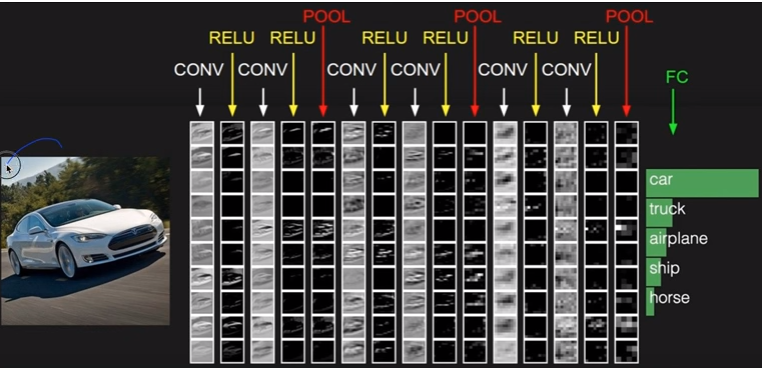

이 그림에서 CONV는 필터가 존재하는 컨볼루셔널 레이어를 뜻합니다. 또한 맨 마지막에 위치한 FC는 fully connected layer를 의미합니다. 참고로 FC 가 여러 개 연결돼 있으면 다층 퍼셉트론이 됩니다.

보통 CNN 에서는 활성화 함수로 ReLU를 많이 사용합니다. 이번 실습에서도 ReLU를
CONV의 활성화 함수로 사용하겠습니다.

위 그림에서 POOL은 풀링 레이어 (pulling layer) 이며, 풀링 레이어의 주된 목적은 모델 파라미터를 줄임으로써 모델의 계산량을 줄이는데 있습니다. 파라미터가 줄어드니 과대적합을 조절하는 효과도 기대할 수 있습니다.

위 그림에서 디뤘던 숫자 2의 예제를 다시 사용해 보겠습니다. 

스트라이드를 통해 다음 그림과 같이 4 * 4의 행렬을 얻게 됩니다. 스트라이드를 통해 얻어진 행렬을 피처맵(feature map) 이라고 합니다. 참고로 피처맵을 활성화 함수에 넣어 구한 행렬을 액티베이션맵 이라고도 합니다. 

다음 그림은 스트라이드를 통해 피처맵을 계산하는 과정을 보여줍니다.

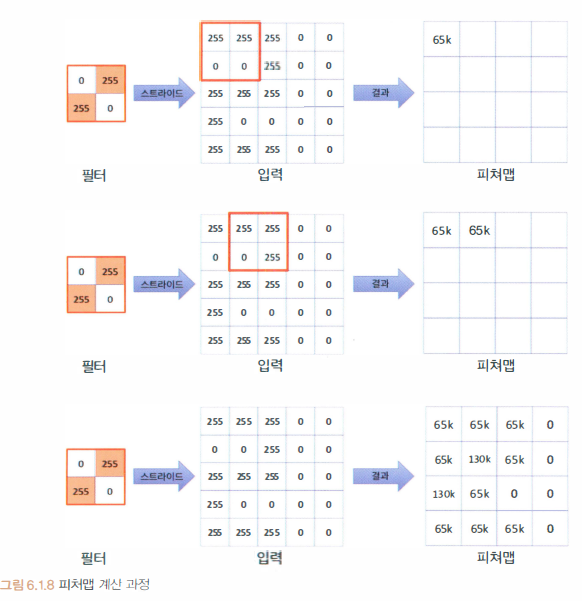

풀링 레이어의 역할에 대해 알아보겠습니다. 

풀링은 주로 맥스 풀링 또는 평균 풀링을 사용합니다. 이번 예제에서는 맥스 풀링을 보여주고 있습니다. 맥스 풀링은 지정된 영 역에서 가장 큰 수치를 선택하고 나머지 값은 버립니다. 

다음 그림에서는 2 * 2 필터에 스트라이드 2를 적용한 맥스풀링의 예를 보여줍니다.

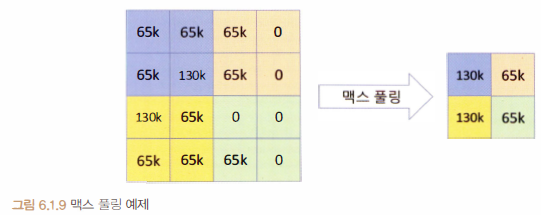

위 그림을 통해 결과적으로 4 * 4 행렬이 맥스 풀링의 결과로 2 * 2 행렬로 크기가 줄어든 것을 확인할 수 있습니다. 피처맵의 크기가 줄어듬으로써 얻는 장점으로는, 첫째 , 계산에 사용될 파라미터의 개수가 줄어들어 계산 속도가 빨라지고, 둘째, 파라미터를 줄임으로써 모델의 분산을 줄이고, 그에 따라 과대적합 가능성을 줄여준다는 것입니다.

### 제로 패딩

마지막으로 제로 패딩(zero padding)의 개념을 소개하겠습니다. 

제로 패딩 이란 0으로 입력 행렬의 테두리를 감싸는 기술입니다. 제로 패딩은 최근 CNN 모델에 상당히 많이 사용되고 있으며, 크게 두 가지 사용 목적을 가지고 있습니다.

첫째 , 제로 패딩은 CONV에 의한 정보 손실을 방지합니다. CONV에서 보통 스트라이드
를 통해 입력된 행렬보다 작아진 행렬이 출력됩니다. 행렬이 작아지면 당연히 작아진 만큼의 정보손실이 있습니다. 제로 패딩을 통해 입력 행렬의 사이즈를 크게 함으로써 스트라이드 이후에도 그 사이즈를 동일하게 유지할 수 있습니다.

둘째, 0으로 감싸진 부분이 테두리라는 정보 역시 CNN이 활용할 수 있는 정보입니다. 제로 패딩을 사용함으로써 CNN이 테두리 정보를 활용할 수 있게 됩니다.

디음 그림의 예제를 보면서 이해해보겠습니다. 최초 5 * 5 행렬이 스트라이드를 통해 4 * 4 피처맵으로 출력 됩니다. 행렬의 크기가 줄었으니 기존의 정보가 함축됐다 또는 줄어들었다라고 볼 수 있습니다.

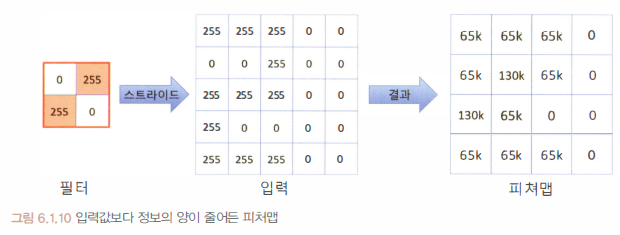

이번에는 제로 패딩이 적용된 예를 보겠습니다. 

제로 패딩으로 인해 스트라이드할 공간이 더많아졌습니다. 만약 필터의 사이 즈가 3 * 3 이고 스트라이드를 1 픽셀씩 할 경우, 피처맵은 5 * 5 로 제로패딩을 하기 전의 입력 행렬의 사이즈와 동일한 사이즈로 출력될 것입니다.

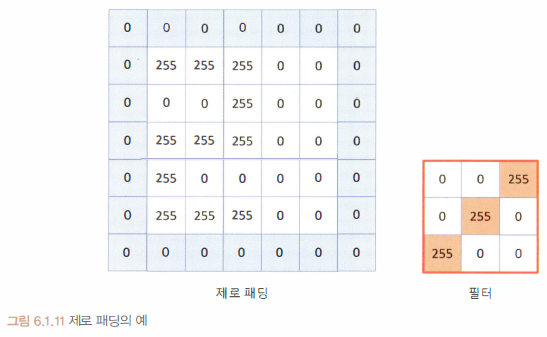

### CNN으로 컬러 이미지 분류하기

MNIST 손글씨 데이터는 흑백 이미지입니다. 만약 컬러 이미지를 데이터로 사용할 경우 한가지만 더 신경 쓰면 됩니다. 컬러 이미지는 단순히 RGB, 즉, 빨강, 녹색, 파란색 레 이어가 겹쳐진 색상입니다. 각 색상은 흑백과 마찬가지로 0부터 255 까지의 값을 가지 고 있습니다.

예를 들어, 

**흑백 이미지와 컬러 이미지의 텐서 형태를 비교해보면 가로 28픽셀, 세로 28픽셀의 흑백 이미지 10장을 처리할 경우 텐서는 (10, 28, 28, 1) 의 형태를 갖고**, **동일한 크기의 컬러 이미지는 (10, 28, 28, 3)의 텐서 형태를 갖습니다.** 

텐서의 10은 이 미지 개수, 28은 가로 픽셀 수, 28은 세로 픽셀수, 그리고 마지막 숫자는 몇 개의 색상으로 색을 구성하는지를 의미 합니다.

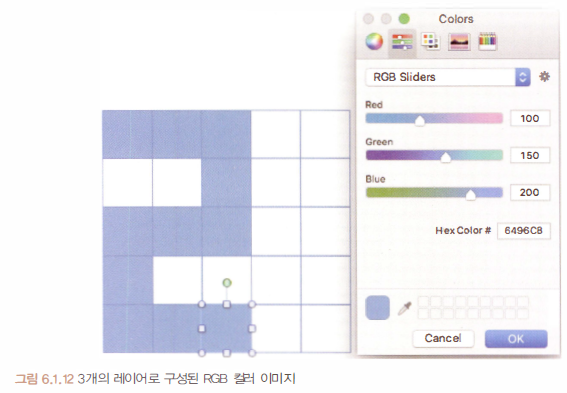

위 그림을 통해 컬러 이미지는 0부터 255 까지의 값을 지닌 빨강, 녹색, 파랑 레이어가 겹쳐서 보이는 색상임을 알 수 있습니다. CNN 에서 이 겹쳐진 레이어의 개수를 깊이 (depth) 라고 부릅니다. 다음 그림을 통해 하나의 필터가 어떻게 세 색상 레이어에 적용되는지 보겠습니다. 

하나의 필터에는 깊이만큼의 하위 필터가 존재하고, 하위 필터에는 각각 자기 반의 파라미터를 가지고 있습니다. 아래 예제에서 대각선 필터의 예를 보겠습니다. 빨강 레이 어에는 빨강 필터, 녹색 레이어에는 녹색 필터, 파랑 레이어에는 파랑 필터가 스트라이드를 하며 각 피처맵 을 만들고, 세 개의 피처맵이 더해진 후 편형 값까지 더해져서 하나의 피처맵이 완성됩니다.

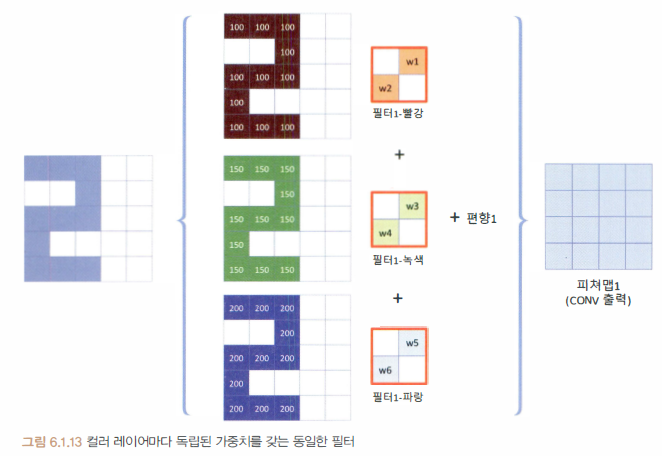

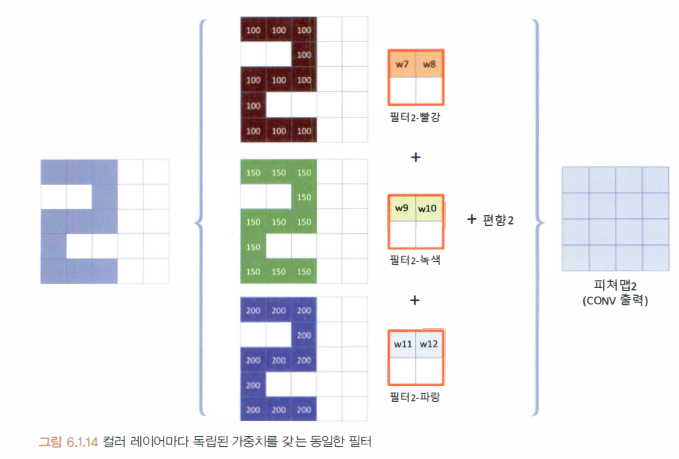

위 그림에서 알 수 있듯이 또 다른 필터 역시 깊이와 동일한 개수의 하위 필터를 가지 고 있고, 각 하위 필터는 자신만의 파라미터를 갖습니다. 한 개의 필터는 결과적으로 하나의 피처맵을 출력하므로 만약 10 개의 필터가 한 CONV에 있다면 다음 레이어에 입 력되는 깊이는 10 이됩니다.

### CNN 모델 학습 이해하기

다음 그림을 통해 컬러 손글씨 이미지 예측 CNN 모델을 알아보겠습니다.

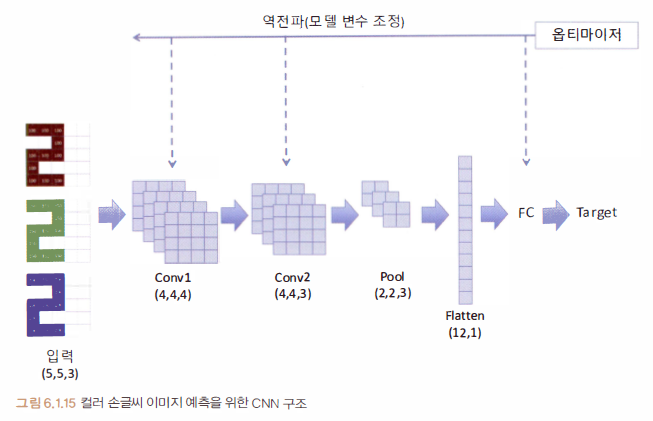

위 그림 처럼 만약에 입력 데이터가 컬러 이미지일 경우 깊이는 3 이 되며, 그림에서와 같이 빨강 레이어, 녹색 레이어, 파랑 레이어 세 개가 입력 데이터로 들어가게 됩니다. 

첫 번째 CONV에 4 개의 필터가 존재하며 그림에서 CONV 1 의 출력 값으로 4개의 피처맵이 출력 되는 것을 볼 수 있습니다. 두 번째 CONV에는 총 3 개의 필터가 존재하고 세 개의 피처맵이 출력됩니다. 그 뒤에 있는 풀링 레이어에서 피처맵의 크기가 절반으로 줄어 들어 2 * 2 의 형태의 피처맵이 세 개 존재하는 것을 확인할 수 있습니다. 풀링 레이어 이후의 모든 값을 일렬로 정렬 시켜서 한 개의 배열에 총 2 * 2 * 3 개 의 값이 있는 것을 확인할 수 있습니다. 

이 12 개의 값은 CONV로 획득된 특징들이며, 특징들을 FC에 연결시켜 숫자 0부터 9까지 의 값을 상징하는 10 개의 노드로 값을 전달한 후, 소프트맥스를 통해 각 숫자에 대한 확률을 출력합니다. 옵티마이저를 사용해 역전파를 통해 각 레이어에 존재하는 파라미터를 최적화합니 다.

### 파라미터 최적화

학습의 목적은 각 레이어에 존재하는 파라미터를 최적화하는 것입니다. CNN은 CONY와
FC에 파라미터가 존재합니다. CONV는 특징을 추출하는 레이어이고, FC는 추출된 특징을
가지고 분류를 수행하는 레이어입니다. 학습을 시작할 때는 무작위로 파라미터의 값을 부여하지만 학습과정에서 진행되는 역전파를 통해 각 파라미터가 조금씩 변경되며 알맞은 값으로 최적화됩니다.

잎서 예제에서 대각선 필터, 동그라미 필터 등의 각 필터가 특징을 추출하는 것을 알아봤는데, 각 필터가 어떤 특징을 찾아야 하는지는 누가 설정하는 것일까요? 

실습 과정에서 확인하겠지만 설계자는 필터의 개수와 형태만 정할 뿐 A 필터는 대각선 필터, B 필터는 동그라미 필터라는 식으로 역할을 직접 부여 하지 않습니다. 필터의 역할은 최적화 과정을 통해 모델이 스스로 찾아 부여하게 됩니다.

CNN 모델의 예측값과 데이터의 실제값의 차이를 줄이는 방향으로 모델을 최적화함으로써 좀 더 의미 있는 필터가 CONV에 만들어지고 더욱 의미 있는 분류기(FC) 가 완성 됩 니다.

보통 CNN은 경사하강법을 사용해 모델을 최적화합니다. 아래 그림에서 Loss는 예측값과 실제값의 차이이고, w는 모델의 파라미터입니다. Loss가 가장 낮은 부분은 아래 그래프에서 미분값이 0 인 부분이므로 현재 w 인 지점에서의 미분값을 구해 그 미분값이 양수면 왼쪽 방향으로, 음수면 오른쪽 방향으로 w값을 조금씩 이동해서 미분값이 최저가 되는 곳으로 w를 조정 합니다.

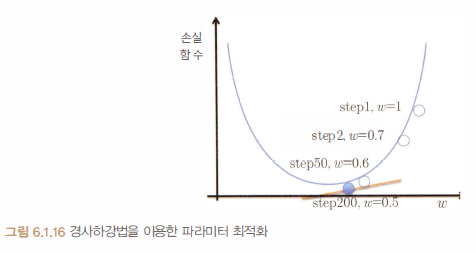

.

# ----------------------------------------------------------------

## 텐서플로우로 CNN 실습하기
텐서플로우로 아래 그림과 동일한 CNN을 직접 구현하고, MNIST 손글씨로 학습 및 테스트를 진행보도록 하겠습니다.

In [1]:
from IPython.display import Image

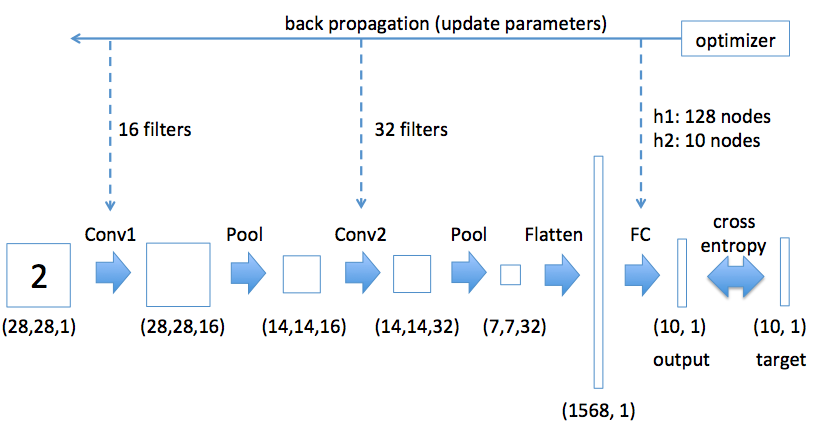

In [4]:
Image("practice_cnn.png", width=800, height=200)

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

# 항상 같은 결과를 갖기 위해 랜덤 시드 설정
tf.random.set_seed(1)

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

### 데이터 획득

MNIST 데이터를 내려 받아 학습 데이터 및 테스트 데이터로 분리해서 저장합니다.

In [11]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

.

MNIST 데이터는 다음 그림처럼  28 × 28의 픽셀 데이터입니다. 각 픽셀은 흑백 사진과 같이 0 부터 255 까지의 그레이스케일을 가지고 있습니다.

In [12]:
# sample to show gray scale values
print(x_train[0][8])

[  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241
   0   0   0   0   0   0   0   0   0   0]


.

**0** 부터 **9**까지의 이미지에 해당하는 숫자를 확인할 수 있습니다.

In [13]:
# sample to show labels for first train data to 10th train data
print(y_train[0:9])

[5 0 4 1 9 2 1 3 1]


이미지를 시각화하여 출력해보면 다음과 같습니다.

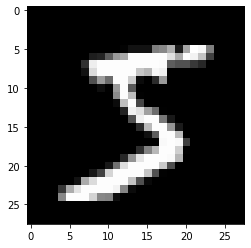

In [14]:
image = x_train[0]
image.shape
# (28, 28)

# gray가 없으면 칼라 이미지로 나오는 것을 볼 수 있음
plt.imshow(image, 'gray') 

plt.show()

.

테스트 데이터는 **10000** 개의 샘플을 가지고 있습니다.  
모든 테스트 데이터는 **28 * 28** 의 이미지입니다.

In [8]:
print("test data has " + str(x_test.shape[0]) + " samples")
print("every test data is " + str(x_test.shape[1]) 
      + " * " + str(x_test.shape[2]) + " image")

test data has 10000 samples
every test data is 28 * 28 image


.

### 데이터 구조 변경하기
입력 레이어에 데이터를 넣기 위해서 데이터의 구조를 변경해줍니다.

In [9]:
import numpy as np
x_train = np.reshape(x_train, (60000,28,28,1))
x_test = np.reshape(x_test, (10000,28,28,1))

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### 데이터 정규화

데이터 정규화는 보통 학습 시간을 단축하고, 더 나은 성능을 구하도록 도와줍니다.  

MNIST 데이터의 모든 값은 0부터 255의 범위 안에 있으므로, 255로 값을 나눠줌으로써, 모든 값을 0부터 1 사이의 값으로 정규화합니다.  

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

### 실제값을 one hot encoding으로 변경하기
손실 함수에서 크로스 엔트로피를 계산하기 위해, 실제값은 one hot encoding 값으로 변경합니다.

In [11]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

### CNN 텐서플로우로 구현하기

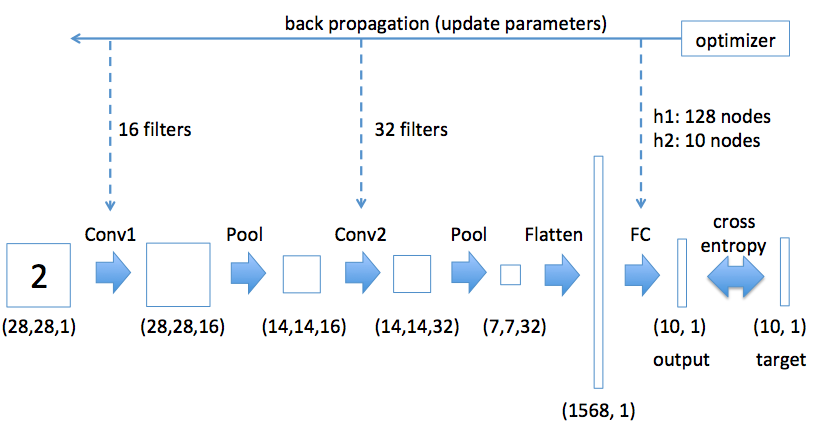

In [16]:
Image("practice_cnn (1).png", width=800, height=200)

다음 코드를 실행해 CNN을 구현합니다.

In [13]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(28,28,1),padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

위의 코드를 간략히 알아보자면, 첫 번째 CONV 레이어는 총 l6 개의 필터를 가지고 있고 필터의 크기는 5 × 5 입니다. 편향값(bias)은 필터의 개수만큼 만들어주고, 활성화함수로 ReLU를 사용합니다.

CONV 레이어 다음으로 풀링 레이어를 적용해 액티베이션맵의 크기를 줄입니다. 액티베 이션맵의 크기를 줄임으로써 파라미터가 줄어들어 모델 크기가 작아지고, 과대 적합의 위험도 감소시킵니다.

풀링 레이어의 영향으로 액티베이션 맵의 크기는 14 × 14가 됐습니다. 이 값은 다음에 이어지는 CONV2 에 입력 됩니다. CONV2는 총 32 개의 필터를 가지고 있습니다. 풀링 레 이어 이후의 액티베이션 맵의 크기는 7 × 7 이 됩니다.

FC (Dense) 는 CONV를 통해 추출된 이미지의 특징들을 입력 받아 0부터 9까지의 숫자중 하나로 이미지를 분류합니다. Flatten을 사용해 모든 특징들을 하나의 배열로 형변환합니다. 형 변환된 특징들은 FC(Dense) 의 입력 값이 됩니다.

FC 영역에서는 총 2 개의 Dense 레이어가 존재합니다. 첫 번째 레이어에는 128 개의 노드, 두 번째 레이어에는 10 개의 노드가 존재합니다. 두 번째 레이어에 10 개의 노드가 존재하는 이유는 10 개 노드의 값들을 소프트맥스에 입력 해서 각 노드별 확률을 구하기 위해서 입니다.

각 노드는 숫자 0부터 9를 의미하며 이 예측값은 크로스 엔트로피를 통해 실제값과의 차이를 계산하는데 사용됩니다.

.

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               200832    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

크로스 엔트로피와 아담 옵티마이저를 사용해 모델을 최적화시키도록 구성 했습니다. 

In [15]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

모델은 두 번 이상 모델의 개선이 없을 때 조기 종료하도록 설정 했습니다.

In [16]:
callbacks = [EarlyStopping(monitor='val_accuracy', 
                            patience=2, 
                            restore_best_weights=False),
                            ModelCheckpoint(filepath='best_model.h5', 
                            monitor='val_accuracy', 
                            save_best_only=True)]

.

다음 코드를 실행해 학습을 시작합니다.

In [17]:
model.fit(x_train, y_train,
          batch_size=500,
          epochs=5,
          verbose=1,
          validation_split = 0.1, 
          callbacks=callbacks)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 26s 476us/sample - loss: 0.4852 - accuracy: 0.8710 - val_loss: 0.1198 - val_accuracy: 0.9672
Epoch 2/5
54000/54000 [==============================] - 25s 467us/sample - loss: 0.1068 - accuracy: 0.9679 - val_loss: 0.0735 - val_accuracy: 0.9795
Epoch 3/5
54000/54000 [==============================] - 25s 470us/sample - loss: 0.0728 - accuracy: 0.9779 - val_loss: 0.0638 - val_accuracy: 0.9825
Epoch 4/5
54000/54000 [==============================] - 26s 474us/sample - loss: 0.0549 - accuracy: 0.9831 - val_loss: 0.0497 - val_accuracy: 0.9858
Epoch 5/5
54000/54000 [==============================] - 26s 477us/sample - loss: 0.0440 - accuracy: 0.9865 - val_loss: 0.0406 - val_accuracy: 0.9890


.

다음 코드를 실행해 테스트 결과를 확인합니다.

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.033640890016499905
Test accuracy: 0.9884


테스트 결과, 98.84%의 정확도를 확인할 수 있습니다.